In [1]:
import numpy as np
import numpy.matlib

import matplotlib.pyplot as plt
import matplotlib.pylab as plt
from matplotlib.pyplot import figure

import scipy.integrate
from scipy.integrate import solve_ivp
from scipy.sparse import csr_matrix, triu, spdiags
from scipy.sparse.linalg import spsolve, splu
import scipy.sparse

import sys
np.set_printoptions(threshold=sys.maxsize)

import time
import warnings
warnings.filterwarnings('ignore')
# %matplotlib notebook
%matplotlib widget

### Problem 1

### A1

In [2]:
# L = 10 
# x_change = np.linspace(-L, L, 200)
# deltax = x_change[-1] - x_change[-2]

In [3]:
L = 10
x = np.arange(-L, L, 0.1)
deltax = x[-1] - x[-2]

In [4]:
m = 200
zero = np.zeros((m))
one = np.ones((m))
Bin = np.array([-one, zero, one])
d = np.array([-1,0,1])
A = spdiags(Bin, d, m, m, format = 'csc')

In [5]:
A[0,-1] = 1
A[-1,0] = -1

In [6]:
A = A/(2*deltax)

In [7]:
A1 = A.todense().copy()

In [8]:
# plt.spy(A)

### A2

In [8]:
f = lambda x: np.exp(-(x-5)**2)
xp = [-L, L]

dt = 0.5
term = 10 # t = 10 
x = np.arange(-L,L,0.1)
N = len(x)

x_evals = np.arange(0,term+dt, dt)

y0 = f(x)

In [9]:
# C = -0.5 
A_2 = (-0.5*A)

In [10]:
def PDE(t,x,A):
    u_t = A@x
    return u_t 

In [11]:
tic = time.time()
sol = solve_ivp(lambda t,x: PDE(t,x,A_2), xp, y0, t_eval = x_evals)
toc = time.time()
# print(toc-tic)

In [12]:
A2 = sol.y

In [13]:
# A2.shape

### A3

In [14]:
f = lambda x: np.exp(-(x-5)**2)
L = 10 
xp = [-L, L]
# x = np.arange(-L,L,0.1)
# N = len(x)

dt = 0.5
term = 10 # t = 10 

x_evals = np.arange(0,term+dt, dt)

y0 = f(x)

In [15]:
# C = function
def funcPDE(t,u,A):
    c = -(1+2*np.sin(5*t)- np.heaviside((x-4),0))
    A_3 = -(c*A)
    u_t = A_3@u
    return u_t

In [16]:
tic = time.time()
sol1 = solve_ivp(lambda t,u: funcPDE(t,u,A),xp, y0, t_eval = x_evals)
toc = time.time()
# print(toc-tic)

In [17]:
A3 = sol1.y

In [18]:
x_evals.shape

(21,)

### Problem 2

### A4

In [26]:
# delta x or delta y 
n = 64
l = np.linspace(-L, L, n+1)
dl = l[1]-l[0]

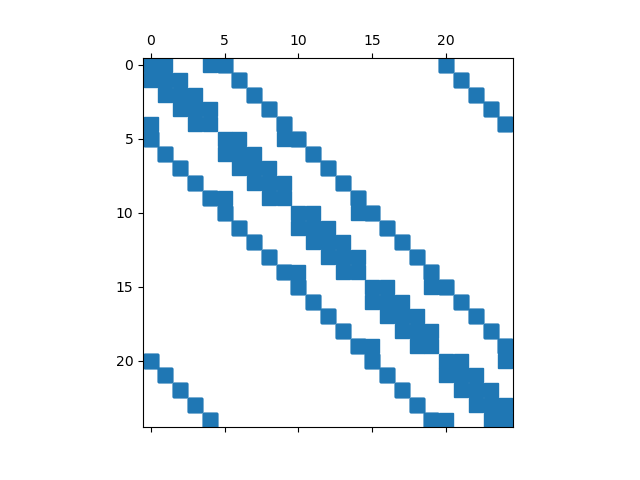

In [8]:
import numpy as np
import scipy.sparse
import matplotlib.pyplot as plt

def A(m):

    # m = 64 # N value in x and y directions
    n = m*m # total size of matrix

    e1 = np.ones(n) # vector of ones
    Low1 = np.tile(np.concatenate((np.ones(m-1), [0])), (m,)) # Lower diagonal 1
    Low2 = np.tile(np.concatenate(([1], np.zeros(m-1))), (m,)) #Lower diagonal 2
                                        # Low2 is NOT on the second lower diagonal,
                                        # it is just the next lower diagonal we see
                                        # in the matrix.

    Up1 = np.roll(Low1, 1) # Shift the array for spdiags
    Up2 = np.roll(Low2, m-1) # Shift the other array

    A = scipy.sparse.spdiags([e1, e1, Low2, Low1, -4*e1, Up1, Up2, e1, e1],
                             [-(n-m), -m, -m+1, -1, 0, 1, m-1, m, (n-m)], n, n)
    
    return A

plt.spy(A(5)) # view the matrix structure
plt.show()

In [32]:
A[0,0] = 2
A = A/(dl**2)

In [ ]:
A4 = np.copy(A.toarray())

In [22]:
# #alternatively
# m = 64
# n = m*m
# e1 = np.ones((n)).T # vector of ones
# Low1 = np.matlib.repmat(np.concatenate((np.ones((m-1)), np.array([0]))), 1,m).reshape(n)
# Low2 = np.matlib.repmat(np.concatenate((np.array([1]),np.zeros((m-1)))), 1,m).reshape(n)
# Up1 = np.roll(Low1, 1) # Shift the array
# Up2 = np.roll(Low2, m-1) # Shift the other array
# Bin = np.array([e1, e1, Low2, Low1, -4*e1, Up1, Up2, e1, e1])
# d = np.array([-(n-m), -m, -m+1, -1, 0, 1, m-1, m, (n-m)])
# A = spdiags(Bin,d, n, n, format = 'csc')
# A[0,0] = 2
# # A = A/(d1**2)

In [23]:
# plt.spy(A, markersize='8', marker='o')

In [25]:
# plt.show()

In [53]:
# print(A.toarray()[0:18,-5:-1])

In [26]:
# A4 = A.todense().copy()

### A5

In [9]:
def B(m):
    # m = 5
    n = m*m
    e1 = np.ones((n)).T # vector of ones

    d = np.array([-((m**2)-m), - m, m, (m**2)-m])
    Bin = np.array([e1, -e1, e1, -e1])


    B = spdiags(Bin,d, n, n, format = 'csc')
    # B = B/(2 * dl)
    return B

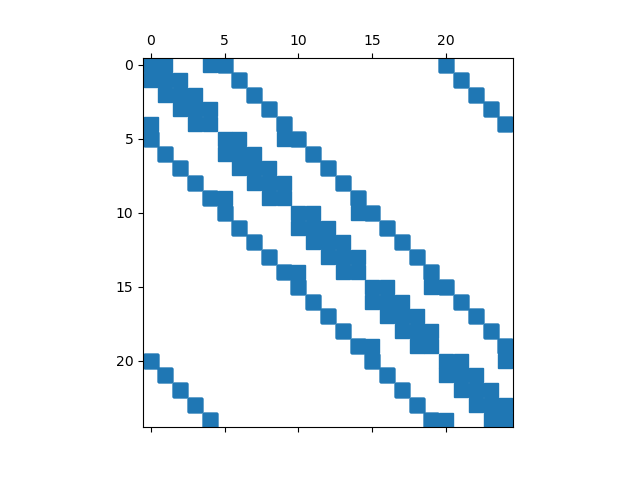

In [10]:
plt.spy(B(5))
plt.show()

In [12]:
# A5 = np.copy(B.toarray())

In [13]:
# A5 = B.todense().copy()

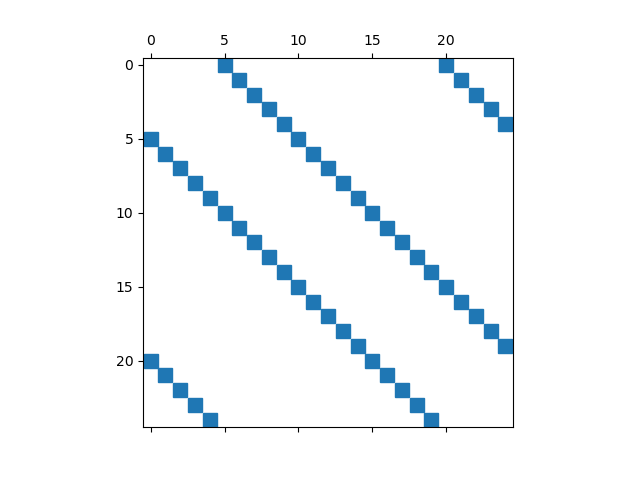

In [3]:
plt.spy(B)

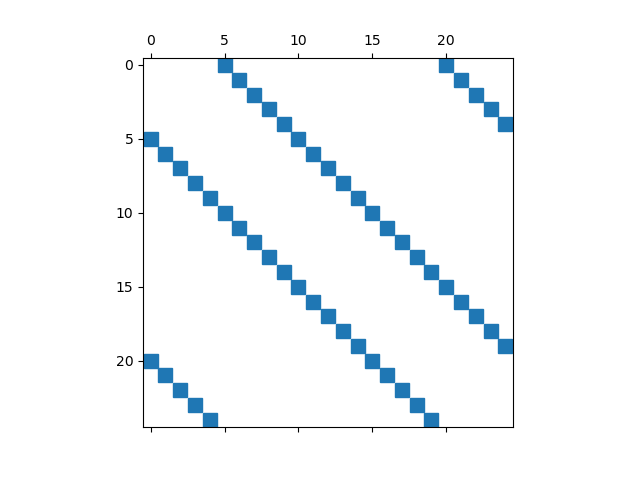

In [4]:
plt.show()

In [16]:
# print(B.toarray()[0:21,0:21])

### A6

In [2]:
m = 64
n = m*m
e1 = np.ones((n)).T # vector of ones

d_C = np.array([-1, 0, 1])
Bin_C = np.array([e1, -2*e1, e1])

C = spdiags(Bin_C,d_C, n, n, format = 'csc')

# periodic
C[0,4095] = 1
C[4095,0] = 1

C = C/(dl**2)

NameError: name 'spdiags' is not defined

In [33]:
plt.spy(C)

In [34]:
A6 = np.copy(C.toarray())

In [35]:
# A6 = C.todense().copy()

### A7

In [36]:
v = 0.001
L = 10
xp = [0, 4]

# time
t_evals = np.linspace(0,4,9)
dt = 0.5

# delta x or delta y 
n = 64
l = np.linspace(-L, L, n+1)
dl = l[1]-l[0]

In [37]:
# # initial conditions 
# for x and y (1 - 64)

w0 = np.array([])

for x in range(1, 65):
    for y in range(1, 65):
        k = np.exp(-2*(x**2) - ((y**2)/20))
        w0 = np.append(w0,k)

In [38]:
def func_ivp(t, w):
    
    v = 0.001
    
    # update psi 
    psi = scipy.sparse.linalg.spsolve(A, w * (dl**2))
    
    dw = (v*A@w) - ((B@psi)*(C@w)) + ((C@psi)*(B@w))
    # dw = dw.reshape(4096,)
    
    return dw 

In [ ]:
sol = scipy.integrate.solve_ivp(lambda t, w: func_ivp(t, w), xp, w0, t_eval = t_evals)

### misc code 

In [34]:
def func_ivp(w, psi):
    
    # update w
    for a in range(1,65):
        print(a)
        
    w = np.zeros(len(t_evals))
    
    for i in range(
    
    # update psi
    psi = scipy.sparse.linalg.spsolve(A, w*l**2)
    
    dw = (v*A*w) - ((B*psi)*(C*w)) + ((C*psi)*(B*w))
    dw = dw.reshape(4096,)
    
    return dw 

In [35]:
# sol = scipy.integrate.solve_ivp(lambda w, psi: func_ivp(w0_psi, psi_0), xp, w0, t_eval = t_evals)
# # scipy.integrate.solve_ivp(func_ivp, xp, w0, t_eval = t_evals)

### A8

In [36]:
import scipy.linalg 

P,L,U = scipy.linalg.lu(A.todense())

In [37]:
y = np.linalg.solve(L,P.T@(w0_psi*dl**2))

In [38]:
psi_0_PLU = np.linalg.solve(U,y)

### A9